## Procesamiento Digital de Señales

### Tarea Semanal 5: Estimacion Espectral, Metodo de Welch y de Blackman Tukey (Correlograma)

##### Por Gabriel Crisafio

Bibliografia: Holton

Bibliografia: Hayes cap 8

En el Holton se muestra el Analisis Matematico para una senoidal
Veremos el efecto de aplicar una ventana Rectangular y Hamming, desde el punto de vista muestreal y frecuencial

![image.png](Enunciado.jpeg)
![image.png](Enunciado_2.jpeg)

En esta actividad, generaremos 200 señales senoidales de una frecuencia $\dfrac{f_s}{4} = \dfrac{π}{2} = Ω_0$ a las cuales les sumaremos una señal de ruido uniforme que sigue la siguiente distribucion:

$$ f_r \sim \mathcal{U}(-1/2, \, 1/2) $$

Lo que trataermos de probar es que herramienta nos permite estimar la amplitud de las señales luego de que hayan sido contaminadas con ruido.
El primer estimador consistira en ver que valor toman las senoidales en potencia para una frecuencia de $\dfrac{f_s}{4}$, y hacer la media de las mismas.
El segundo estimador consistira en integrar la potencia de las senoidales en un entorno WBINS cercanos a $\dfrac{f_s}{4}$. Hacemos esto porque al meter la señal de ruido, la energia de la senoidal se "desparrama" y ya no esta concentrada en un delta en su frencuencia.

A cada realizacion le aplicaremos las ventanas vistas: Bartlett, Hann, Blackman y FlatTop. Luego veremos las caracteristicas de cada una al mejorar o empeorar algunos parametros de los estimadores

A continuación visualizaremos el espectro de las senoidales con el ruido aplicado en una escala vertical **logaritmada [dB]**. Podemos notar como, debido a la diferentes ventanas aplicadas, la energia se concentra dentro de la frencuencia elegida.

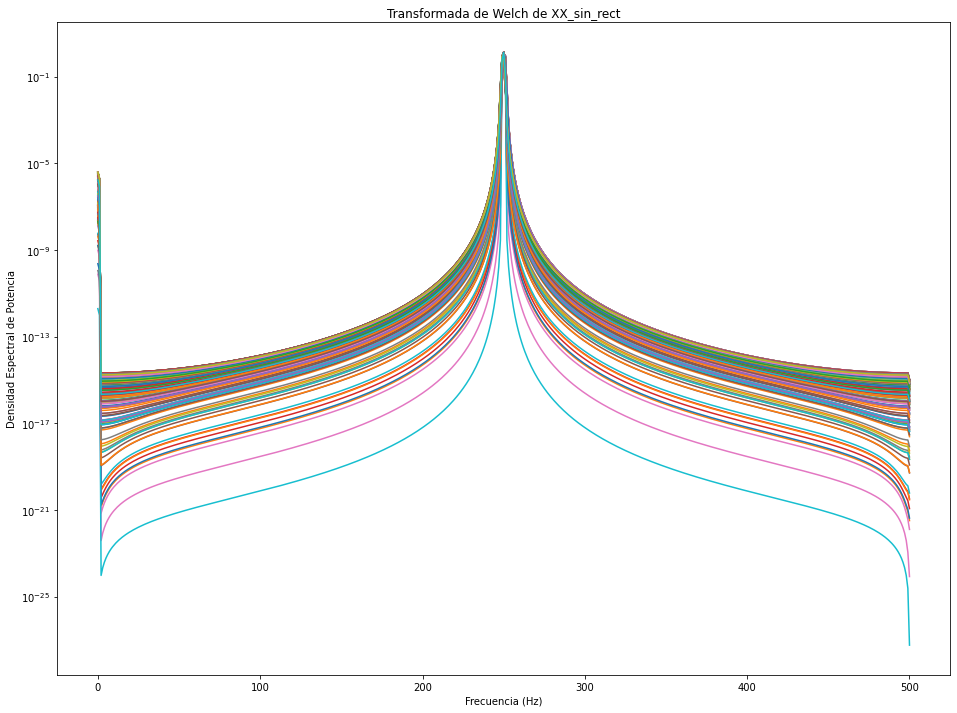

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

fs = 1000  # frecuencia de muestreo
N = 1000   # cantidad de muestras
freq = fs/4
DC = 0
Amplitud = 2

realizaciones = 200
ts = 1/fs
tt = np.linspace(0, (N-1)*ts, N)

noise = (np.random.rand(1, realizaciones) - 0.5)
tt = np.linspace(0, (N-1)*ts, N).reshape((N, 1))
Omega = (np.pi/2 + noise * ((np.pi*2/N))) * fs * tt

XX_sin_rect = np.sin(Omega) * Amplitud

# Aplicar la transformada de Welch
frequencies, Pxx = sig.welch(XX_sin_rect, fs, nperseg=1000, axis = 0)

# Graficar el resultado
plt.figure()
plt.gcf().set_size_inches(16, 12)
plt.semilogy(frequencies, Pxx)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad Espectral de Potencia')
plt.title('Transformada de Welch de XX_sin_rect')
plt.show()


En la estimacion espectral se puede ver que hay ruido de baja frecuencia.
Podemos notar esto en la simulacion si ponemos noise = 0

Para poder visualizar mejor el efecto se podrian graficar en 3D y ver el resultado del promedio de las realizaciones

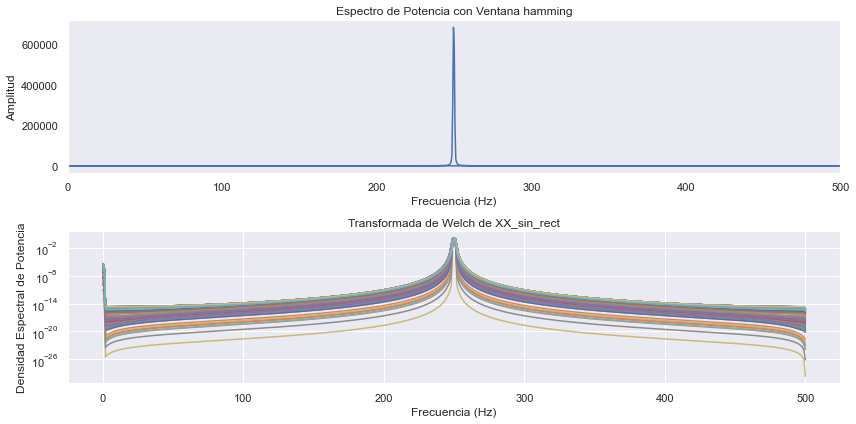

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

# Parámetros de la señal
fs = 1000  # Frecuencia de muestreo
N = 1000  # Cantidad de muestras
freq = fs / 4
DC = 0
Amplitud = 2

# Generar realizaciones
realizaciones = 200
ts = 1 / fs
tt = np.linspace(0, (N - 1) * ts, N)

# Generar señal con ruido
noise = (np.random.rand(1, realizaciones) - 0.5)
tt = np.linspace(0, (N - 1) * ts, N).reshape((N, 1))
Omega = (np.pi / 2 + noise * ((np.pi * 2 / N))) * fs * tt

XX_sin_rect = np.sin(Omega) * Amplitud

# Calcular la función de autocorrelación
autocorr = np.correlate(XX_sin_rect[:, 0], XX_sin_rect[:, 0], mode='full')

# Aplicar una ventana (puedes elegir Hanning, Bartlett, Blackman o Hamming)
window_type = 'hamming'  # Cambia a 'hanning', 'bartlett', 'blackman' o 'hamming' según la ventana deseada

if window_type == 'hanning':
    window = np.hanning(len(autocorr))
elif window_type == 'bartlett':
    window = np.bartlett(len(autocorr))
elif window_type == 'blackman':
    window = np.blackman(len(autocorr))
elif window_type == 'hamming':
    window = np.hamming(len(autocorr))
else:
    window = np.ones(len(autocorr))  # Sin ventana

# Aplicar la ventana a la función de autocorrelación
autocorr_windowed = autocorr * window

# Aplicar Blackman-Tukey a la función de autocorrelación con ventana
spec = np.abs(np.fft.fft(autocorr_windowed))  # Transformada de Fourier de la autocorrelación con ventana
freqs = np.fft.fftfreq(len(autocorr_windowed), d=ts)

# Aplicar la transformada de Welch
frequencies, Pxx = sig.welch(XX_sin_rect, fs, nperseg=1000, axis=0)

# Graficar ambas funciones en el mismo gráfico
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(freqs, spec)
plt.title(f'Espectro de Potencia Blackman-Tuley con Ventana {window_type}')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0, fs / 2)
plt.grid()

plt.subplot(2, 1, 2)
plt.semilogy(frequencies, Pxx)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad Espectral de Potencia')
plt.title('Transformada de Welch de XX_sin_rect')

plt.tight_layout()
plt.show()


In [20]:
print(np.var(spec))
print(np.var(Pxx))

0.0009474985563752319
0.0038176727836901642


a) ¿Qué estimador ha elegido? Explique brevemente los fundamentos principales y el enfoque del método elegido.

Considerando que el mayor problema es la varianza, el metodo de Blackman-Tukey parece ser el mas adecuado para una cantidad de N=1000 muestras 
Considerando:
    .señal de baja frecuencia
    .sesgo corregible